In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### We won't use all of these, but they are imported for future extensions
# from surprise import dictset
# from surprise import Reader
# from surprise import KNNWithMeans, SVD
# from surprise import Reader, similarities, dictset, accuracy
# from surprise.model_selection import cross_validate, KFold, ShuffleSplit
# from surprise.model_selection import GridSearchCV

pd.options.display.float_format='{:,.3f}'.format

In [2]:
%cd C:\\Users\\SAQ-PC\\Downloads\\australian_user_reviews.json

C:\Users\SAQ-PC\Downloads\australian_user_reviews.json


In [3]:
steam_merge = pd.read_csv('steam_merge.csv', header=0)
steam_merge

,Unnamed: 0,user_id,item_id,review,recommend,item_name,playtime
0,0,76561197970982479,1250,Simple yet with great replayability. In my opi...,True,Killing Floor,10006
1,1,76561197970982479,22200,It's unique and worth a playthrough.,True,Zeno Clash,271
2,2,76561197970982479,43110,Great atmosphere. The gunplay can be a bit chu...,True,Metro 2033,834
3,3,js41637,251610,I know what you think when you see this title ...,True,Barbie™ Dreamhouse Party™,84
4,4,js41637,227300,For a simple (it's actually not all that simpl...,True,Euro Truck Simulator 2,551
...,...,...,...,...,...,...,...
46312,46312,Ghoustik,730,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...,True,Counter-Strike: Global Offensive,3969
46313,46313,76561198312638244,233270,this is a very fun and nice 80s themed shooter...,True,Far Cry® 3 Blood Dragon,533
46314,46314,76561198312638244,130,if you liked Half life i would really recommen...,True,Half-Life: Blue Shift,221
46315,46315,76561198312638244,70,a must have classic from steam definitely wort...,True,Half-Life,1010


In [4]:
steam_merge.drop(columns =['Unnamed: 0'], inplace = True)
steam_merge.columns

Index(['user_id', 'item_id', 'review', 'recommend', 'item_name', 'playtime'], dtype='object')

In [5]:
steam_merge["item_id"] = steam_merge["item_id"].astype('object')
steam_merge.describe()

,playtime
count,"46,317.000"
mean,"9,032.181"
std,"21,790.465"
min,0.000
25%,401.000
50%,"1,568.000"
75%,"6,758.000"
max,"642,773.000"


In [6]:
#steam_merge.to_csv('steam_merge.csv')
steam_merge.dtypes

user_id      object
item_id      object
review       object
recommend      bool
item_name    object
playtime      int64
dtype: object

In [7]:
steam_merge["recommend"] = steam_merge["recommend"].astype(int)

In [8]:
steam_merge

,user_id,item_id,review,recommend,item_name,playtime
0,76561197970982479,1250,Simple yet with great replayability. In my opi...,1,Killing Floor,10006
1,76561197970982479,22200,It's unique and worth a playthrough.,1,Zeno Clash,271
2,76561197970982479,43110,Great atmosphere. The gunplay can be a bit chu...,1,Metro 2033,834
3,js41637,251610,I know what you think when you see this title ...,1,Barbie™ Dreamhouse Party™,84
4,js41637,227300,For a simple (it's actually not all that simpl...,1,Euro Truck Simulator 2,551
...,...,...,...,...,...,...
46312,Ghoustik,730,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...,1,Counter-Strike: Global Offensive,3969
46313,76561198312638244,233270,this is a very fun and nice 80s themed shooter...,1,Far Cry® 3 Blood Dragon,533
46314,76561198312638244,130,if you liked Half life i would really recommen...,1,Half-Life: Blue Shift,221
46315,76561198312638244,70,a must have classic from steam definitely wort...,1,Half-Life,1010


In [9]:
#change nan to empty strings
steam_merge = steam_merge.replace(np.nan, '', regex=True)

In [10]:
steam = steam_merge[['user_id', 'item_id', 'recommend']]

In [11]:
steam

,user_id,item_id,recommend
0,76561197970982479,1250,1
1,76561197970982479,22200,1
2,76561197970982479,43110,1
3,js41637,251610,1
4,js41637,227300,1
...,...,...,...
46312,Ghoustik,730,1
46313,76561198312638244,233270,1
46314,76561198312638244,130,1
46315,76561198312638244,70,1


In [12]:
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans, SVD, SVDpp
reader = Reader(rating_scale=(0,1))

In [13]:
steamData = Dataset.load_from_df(steam[['user_id', 'item_id', 'recommend']], reader)

# Baseline Measures

In [43]:
from surprise import BaselineOnly
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)

cv_results_SVDpp = cross_validate(algo, steamData, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3000  0.3058  0.3044  0.3120  0.3066  0.3057  0.0039  
MAE (testset)     0.1775  0.1820  0.1776  0.1851  0.1803  0.1805  0.0029  
Fit time          0.02    0.02    0.02    0.02    0.03    0.02    0.01    
Test time         0.01    0.02    0.02    0.02    0.00    0.01    0.01    


In [44]:
cv_results_SVDpp['test_rmse'].mean()

0.3057301101696158

In [36]:
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = BaselineOnly(bsl_options=bsl_options)

cv_results_SVDpp_bsl =cross_validate(algo, steamData, verbose=True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3020  0.3088  0.3227  0.3343  0.3137  0.3163  0.0113  
MAE (testset)     0.1927  0.1960  0.2023  0.2086  0.1981  0.1995  0.0055  
Fit time          0.08    0.05    0.03    0.05    0.05    0.05    0.01    
Test time         0.01    0.00    0.02    0.02    0.02    0.01    0.01    


In [37]:
cv_results_SVDpp_bsl['test_rmse'].mean()

0.3163063997593486

# Optimization using Grid Search

In [14]:
raw_ratings = steamData.raw_ratings  # obtain raw ratings data from the Dataset
raw_ratings

trainData = steamData  # initially make copies of the rateData
testData = steamData

np.random.shuffle(raw_ratings)

# 80% trainset, 20% testset
threshold = int(.8 * len(raw_ratings))
trainset_raw_ratings = raw_ratings[:threshold]
test_raw_ratings = raw_ratings[threshold:]

# now change the train and test Datasets to the new data
trainData.raw_ratings = trainset_raw_ratings
testData.raw_ratings = test_raw_ratings


In [15]:
from surprise import SVDpp
from surprise.model_selection import GridSearchCV, KFold, cross_validate
from time import time

cv = KFold(n_splits = 3, random_state = 44)

t0 = time()


param_grid = {'n_epochs' : [16,17],
                'n_factors': [8,9],
              'lr_all': [0.014, 0.015,0.016],
              'reg_all':[0.09,0.1,0.11]}

gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=cv)
gs_svdpp.fit(trainData)

print("done in %0.3fs." % (time() - t0))


done in 89.098s.


In [16]:
print(gs_svdpp.best_score["rmse"])
print(gs_svdpp.best_params["rmse"])

0.306833515966892
{'n_epochs': 16, 'n_factors': 9, 'lr_all': 0.014, 'reg_all': 0.1}


In [17]:
pd.set_option('max_colwidth', 100)

df_svdpp = pd.DataFrame.from_dict(gs_svdpp.cv_results)
cols = ['params','split0_test_rmse','split1_test_rmse','split2_test_rmse']
df_svdpp[cols]

,params,split0_test_rmse,split1_test_rmse,split2_test_rmse
0,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.014, 'reg_all': 0.09}",0.302,0.315,0.304
1,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.014, 'reg_all': 0.1}",0.302,0.316,0.304
2,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.014, 'reg_all': 0.11}",0.302,0.316,0.304
3,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.015, 'reg_all': 0.09}",0.303,0.316,0.304
4,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.015, 'reg_all': 0.1}",0.302,0.316,0.304
5,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.015, 'reg_all': 0.11}",0.302,0.316,0.303
6,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.016, 'reg_all': 0.09}",0.303,0.316,0.304
7,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.016, 'reg_all': 0.1}",0.303,0.315,0.304
8,"{'n_epochs': 16, 'n_factors': 8, 'lr_all': 0.016, 'reg_all': 0.11}",0.302,0.316,0.304
9,"{'n_epochs': 16, 'n_factors': 9, 'lr_all': 0.014, 'reg_all': 0.09}",0.303,0.315,0.303


In [18]:
from surprise import accuracy
svdppRMSE = []
kf = KFold(n_splits=5, random_state=44)
for trainset, testset in kf.split(trainData):
    svdpp = SVDpp(n_epochs= 16, n_factors=8, lr_all=0.014, reg_all=0.1)
    svdpp.fit(trainset)
    predictions = svdpp.test(testset)
    svdppRMSE.append(accuracy.rmse(predictions, verbose=True))
svdppRMSE = np.array(svdppRMSE)

RMSE: 0.3032
RMSE: 0.3029
RMSE: 0.3144
RMSE: 0.3165
RMSE: 0.2939


In [19]:
print("RMSE of Train set: ", svdppRMSE.mean())

RMSE of Train set:  0.3061671206223603


In [20]:
from surprise import accuracy
alg = gs_svdpp.best_estimator['rmse']                                  
                                                                                                                     
# retrain on the whole train set
trainset = trainData.build_full_trainset()
alg.fit(trainset) 
# now test on the testset                                                  
testset = testData.construct_testset(test_raw_ratings)                         
predictions = alg.test(testset)                                           
print('Accuracy on the testset:')                                          
accuracy.rmse(predictions) 

Accuracy on the testset:
RMSE: 0.2218


0.22178713121379925

# Precison, Recall, F1 Score

In [28]:
from collections import defaultdict
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


In [108]:
algo = gs_svdpp.best_estimator['rmse']
trainset = trainData.build_full_trainset()
algo.fit(trainset)

testset = testData.construct_testset(test_raw_ratings)                         
predictions = algo.test(testset)

In [110]:
predictions

[Prediction(uid='crysis049', iid=241930, r_ui=1.0, est=0.984012828145215, details={'was_impossible': False}),
 Prediction(uid='76561198085183243', iid=230410, r_ui=1.0, est=0.9222532072602326, details={'was_impossible': False}),
 Prediction(uid='99372239129374234543', iid=357480, r_ui=0.0, est=0.543296499708694, details={'was_impossible': False}),
 Prediction(uid='111222333444555666888', iid=246900, r_ui=1.0, est=0.9171168429574661, details={'was_impossible': False}),
 Prediction(uid='LukasYip', iid=242880, r_ui=1.0, est=0.9653196407910334, details={'was_impossible': False}),
 Prediction(uid='kamiwapax', iid=218230, r_ui=1.0, est=0.9634832190517908, details={'was_impossible': False}),
 Prediction(uid='76561198048504173', iid=319630, r_ui=1.0, est=0.9777663651945185, details={'was_impossible': False}),
 Prediction(uid='FaZeDain', iid=12120, r_ui=1.0, est=1, details={'was_impossible': False}),
 Prediction(uid='FuzzyNoNoseJim', iid=304930, r_ui=1.0, est=0.9633493783818826, details={'was_i

Threshold: 0.5

In [73]:
pre1 = []
rec1 = []
fone1 = []
for k in range(1, 11):
    precisions, recalls = precision_recall_at_k(predictions, k = k, threshold = 0.5)
    
    precision1 = sum(prec for prec in precisions.values()) / len(precisions)
    recall1 = sum(rec for rec in recalls.values()) / len(recalls)
    f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
    pre1.append(precision1)
    rec1.append(recall1)
    fone1.append(f1_score1)

Threshold: 0.7

In [74]:
pre2 = []
rec2 = []
fone2 = []
for k in range(1, 11):
    precisions, recalls = precision_recall_at_k(predictions, k = k, threshold = 0.7)
    
    precision2 = sum(prec for prec in precisions.values()) / len(precisions)
    recall2 = sum(rec for rec in recalls.values()) / len(recalls)
    f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
    pre2.append(precision2)
    rec2.append(recall2)
    fone2.append(f1_score2)

Threshold: 0.9

In [75]:
pre3 = []
rec3 = []
fone3 = []
for k in range(1, 11):
    precisions, recalls = precision_recall_at_k(predictions, k = k, threshold = 0.9)
    
    precision3 = sum(prec for prec in precisions.values()) / len(precisions)
    recall3 = sum(rec for rec in recalls.values()) / len(recalls)
    f1_score3 = 2 * (precision3 * recall3) / (precision3 + recall3)
    pre3.append(precision3)
    rec3.append(recall3)
    fone3.append(f1_score3)

Threshold: 1.0

In [76]:
pre4 = []
rec4 = []
fone4 = []
for k in range(1, 11):
    precisions, recalls = precision_recall_at_k(predictions, k = k, threshold = 1.0)
            
    precision4 = sum(prec for prec in precisions.values()) / len(precisions)
    recall4 = sum(rec for rec in recalls.values()) / len(recalls)
    f1_score4 = 2 * (precision4 * recall4) / (precision4 + recall4)
    pre4.append(precision4)
    rec4.append(recall4)
    fone4.append(f1_score4)

In [68]:
fone

[0.07442268827763912,
 0.07442268827763912,
 0.07442268827763912,
 0.07442268827763912,
 0.07442268827763912,
 0.07442268827763912,
 0.07442268827763912,
 0.07442268827763912,
 0.07442268827763912,
 0.07442268827763912]

In [46]:
#steam_df.groupby('user_id')['item_id'].count().sort_values(ascending = False)

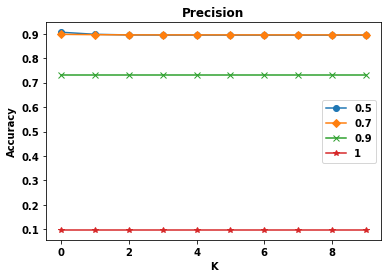

In [78]:
x = np.arange(len(pre1))
plt.plot(x,pre1, label = '0.5', marker = 'o')
plt.plot(x,pre2, label = '0.7', marker = 'D')
plt.plot(x,pre3, label = '0.9', marker = 'x')
plt.plot(x,pre4, label = '1', marker = '*')
plt.title('Precision')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

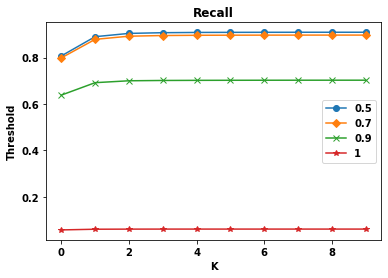

In [79]:
x = np.arange(len(pre1))
plt.plot(x,rec1, label = '0.5', marker = 'o')
plt.plot(x,rec2, label = '0.7', marker = 'D')
plt.plot(x,rec3, label = '0.9', marker = 'x')
plt.plot(x,rec4, label = '1', marker = '*')
plt.title('Recall')
plt.xlabel('K')
plt.ylabel('Threshold')
plt.legend()
plt.show()

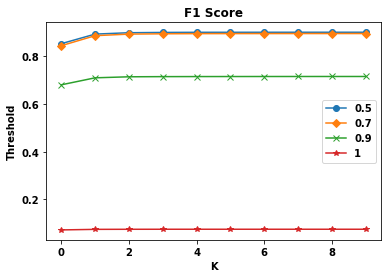

In [84]:
x = np.arange(len(pre1))
plt.plot(x,fone1, label = '0.5', marker = 'o')
plt.plot(x,fone2, label = '0.7', marker = 'D')
plt.plot(x,fone3, label = '0.9', marker = 'x')
plt.plot(x,fone4, label = '1', marker = '*')
plt.title('F1 Score')
plt.xlabel('K')
plt.ylabel('Threshold')
plt.legend()
plt.show()

C:\Users\SAQ-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


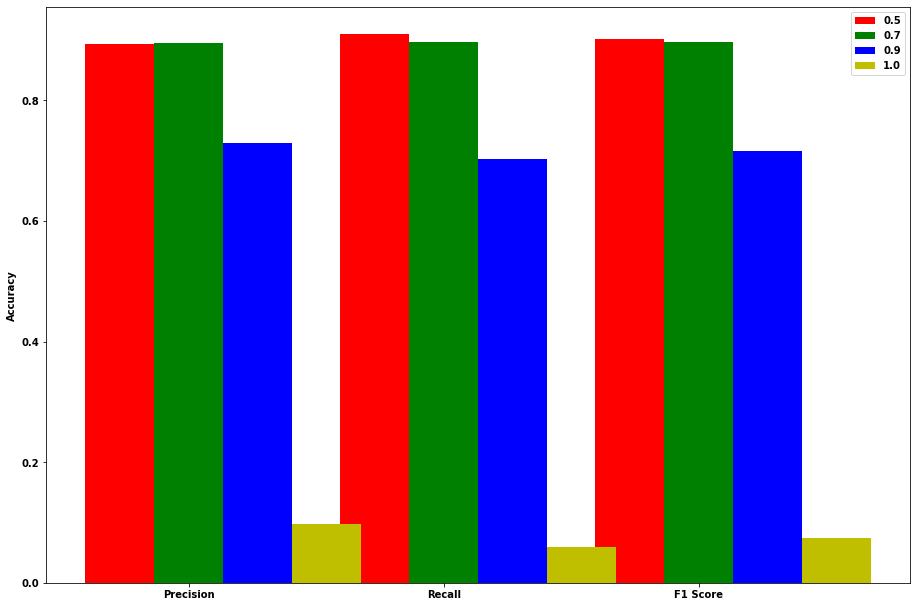

In [114]:
ind = np.arange(3)  
width = 0.27       

fig = plt.figure()
ax = fig.add_subplot(111)
ax = fig.add_axes([0,0,2,2])

vals1 = [precision1, recall1, f1_score1]
rects1 = ax.bar(ind, vals1, width, color='r')
vals2 = [precision2,recall2,f1_score2]
rects2 = ax.bar(ind+width, vals2, width, color='g')
vals3 = [precision3,recall3,f1_score3]
rects3 = ax.bar(ind+width*2, vals3, width, color='b')
vals4 = [precision4,recall4,f1_score4]
rects4 = ax.bar(ind+width*3, vals4, width, color='y')

ax.set_ylabel('Accuracy')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Precision', 'Recall', 'F1 Score') )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('0.5', '0.7', '0.9', '1.0') )

# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)
fig.tight_layout()

plt.show()

In [ ]:
#to compute the Catalog coverage, just take your test users, ask for recommendation for each one of them, 
#and put all the recommended items together. You obtain a large set of different items. 
#Divide the size of this set by the total number of items in your entire catalog


# Cluster Analysis: Bad results

In [38]:
user_texts

,item_id,review
0,245760,If you are a fan of the previous Cybertron gam...
1,32770,This game just sends me back to my when I was ...
2,262150,<3 !!!! <3 !!!! <3 !!!! <3 !!!! I got wiped ou...
3,10,Cool game this game is the 1# online action ga...
4,40970,although my hours look low do not let them foo...
...,...,...
3092,409590,"O jogo não está muito bom no estado atual,mas ..."
3093,327670,"It's like Puzzle Quest and FTL had a nasty, vi..."
3094,40950,great game no lag at all
3095,221180,"This game is awesome, love the setting love th..."


In [21]:
X_mat=steam.pivot_table(values="recommend",index="user_id",columns="item_id")
X_mat

item_id,10,20,30,40,50,60,70,80,130,220,...,510050,512300,512630,514520,516040,521340,521430,521570,521990,527340
user_id,,,,,,,,,,,,,,,,,,,,,
--000--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
--ace--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
--ionex--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-2SV-vuLB-Kg,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-Azsael-,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zv_odd,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
zvanik,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
zynxgameth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [22]:
X_mat=X_mat.fillna(0,axis=0,inplace=False)
X_mat

item_id,10,20,30,40,50,60,70,80,130,220,...,510050,512300,512630,514520,516040,521340,521430,521570,521990,527340
user_id,,,,,,,,,,,,,,,,,,,,,
--000--,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
--ace--,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
--ionex--,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
-2SV-vuLB-Kg,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
-Azsael-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zv_odd,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
zvanik,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
zynxgameth,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [23]:
smat = np.array(X_mat)
smat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10,max_iter=500,random_state=11,verbose=1)

In [25]:
kmeans.fit(smat)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 36661.50328189664
start iteration
done sorting
end inner loop
Iteration 1, inertia 36434.34595284731
start iteration
done sorting
end inner loop
Iteration 2, inertia 35662.69764052359
start iteration
done sorting
end inner loop
Iteration 3, inertia 35552.2050856549
start iteration
done sorting
end inner loop
Iteration 4, inertia 35548.39866088641
start iteration
done sorting
end inner loop
Iteration 5, inertia 35548.253075975554
start iteration
done sorting
end inner loop
Iteration 6, inertia 35548.23050639007
start iteration
done sorting
end inner loop
Iteration 7, inertia 35548.23050639007
center shift 0.000000e+00 within tolerance 6.221892e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 34660.22379720148
start iteration
done sorting
end inner loop
Iteration 1, inertia 34627.21316624129
start iteration
done sorting
end inner loop
Iteration 2, inertia 3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=1)

In [26]:
clusters = kmeans.predict(smat)
clusters.shape

(19913,)

In [27]:
clusters[:100]

array([4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 7, 1, 3, 4, 1, 4, 1, 4, 1, 4, 4, 4,
       4, 1, 4, 4, 4, 7, 4, 4, 4, 1, 4, 4, 3, 4, 4, 1, 5, 4, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 7, 4, 2, 3, 5, 4, 1, 1, 4, 1, 4, 4, 4, 5, 4,
       4, 4, 4, 4, 4, 2, 1, 0, 1, 4, 4, 4, 4, 4, 3, 4, 1, 4, 4, 3, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4])

In [28]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1,2,3,4,5,6,7,8,9,...,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096
0,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.01,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
3,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.01,...,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.09,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.01,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,-0.00,0.00,0.00,0.00,-0.00,0.02,0.00,-0.00,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
def cluster_sizes(clusters, data):
    #clusters is an array of cluster labels for each instance in the data matrix
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(data[clusters == c])
    return size

In [31]:
size = cluster_sizes(clusters, smat)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  210
Size of Cluster 1 =  2867
Size of Cluster 2 =  1201
Size of Cluster 3 =  911
Size of Cluster 4 =  13254
Size of Cluster 5 =  722
Size of Cluster 6 =  32
Size of Cluster 7 =  607
Size of Cluster 8 =  1
Size of Cluster 9 =  108


In [33]:
from sklearn import metrics
silhouettes = metrics.silhouette_samples(smat, clusters)
print(silhouettes[:20])

[ 0.08264354  0.08091476  0.26762947  0.1533858   0.07743009  0.08725871
  0.08196276  0.08264354  0.0592519   0.07733594 -0.02131749  0.56484654
  0.19042728  0.07838613  0.56484654  0.05722234  0.56484654  0.05963272
  0.04924621  0.08061769]


In [35]:
print(silhouettes.mean())

0.13606427342934727


In [36]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #ptl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

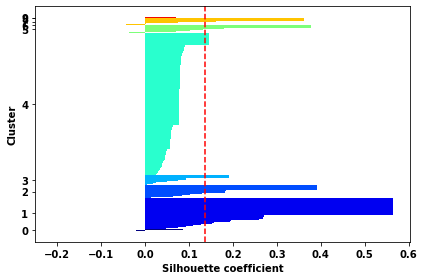

In [37]:
plot_silhouettes(smat, clusters)

In [64]:
titles = pd.DataFrame(steam_merge,columns=['item_id','item_name'])
titles

,item_id,item_name
0,1250,Killing Floor
1,22200,Zeno Clash
2,43110,Metro 2033
3,251610,Barbie™ Dreamhouse Party™
4,227300,Euro Truck Simulator 2
...,...,...
46312,730,Counter-Strike: Global Offensive
46313,233270,Far Cry® 3 Blood Dragon
46314,130,Half-Life: Blue Shift
46315,70,Half-Life


In [65]:
titles = titles.drop_duplicates()
titles

,item_id,item_name
0,1250,Killing Floor
1,22200,Zeno Clash
2,43110,Metro 2033
3,251610,Barbie™ Dreamhouse Party™
4,227300,Euro Truck Simulator 2
...,...,...
46266,307130,Asteria
46295,209120,Street Fighter X Tekken
46299,220090,The Journey Down: Chapter One
46300,262850,The Journey Down: Chapter Two


In [66]:
titles.index = titles['item_id']
titles

,item_id,item_name
item_id,,
1250,1250,Killing Floor
22200,22200,Zeno Clash
43110,43110,Metro 2033
251610,251610,Barbie™ Dreamhouse Party™
227300,227300,Euro Truck Simulator 2
...,...,...
307130,307130,Asteria
209120,209120,Street Fighter X Tekken
220090,220090,The Journey Down: Chapter One


In [67]:
del titles['item_id']
titles

,item_name
item_id,
1250,Killing Floor
22200,Zeno Clash
43110,Metro 2033
251610,Barbie™ Dreamhouse Party™
227300,Euro Truck Simulator 2
...,...
307130,Asteria
209120,Street Fighter X Tekken
220090,The Journey Down: Chapter One


In [72]:
titles['item_name']

item_id
1250                               Killing Floor
22200                                 Zeno Clash
43110                                 Metro 2033
251610                 Barbie™ Dreamhouse Party™
227300                    Euro Truck Simulator 2
                           ...                  
307130                                   Asteria
209120                   Street Fighter X Tekken
220090             The Journey Down: Chapter One
262850             The Journey Down: Chapter Two
431510    Mystic Destinies: Serendipity of Aeons
Name: item_name, Length: 3097, dtype: object

In [43]:
def cluster_report(data, clusters, items, centroids):
    ### returns a dictionay an cluster reports (as data frames) for each cluster
    ### also returns a dictionary of cluster sizes
    
    cDict = {}
    cSize = {}
    for c in np.unique(clusters):
        cDataFrame = pd.DataFrame([])
        cDataFrame["Items"] = items
        centroid_vals = centroids.iloc[c]
        cDataFrame["Mean Rating"] = centroid_vals
        docs_in_cluster = data[clusters==c]
        cluster_df = (docs_in_cluster != 0).sum(axis=0)
        cDataFrame["UserFreq"] = cluster_df
        doc_percent = cluster_df * 100 / len(docs_in_cluster)
        cDataFrame["% of Users"] = doc_percent
        cDict[c] = cDataFrame
        cSize[c] = len(docs_in_cluster)
    return cDict, cSize

In [69]:
cDict, cSize = cluster_report(smat, clusters, titles['item_name'], centroids)

In [70]:
def display_clusters(clusterDict, clusterSize, numItems):
    for c in clusterDict.keys():
        cluster_rep = clusterDict[c]
        print("\nCluster ", c, "size =", clusterSize[c])
        print("----------------------------------------------")
        print(cluster_rep.sort_values(by="UserFreq", ascending=False).head(numItems))
    return

In [71]:
display_clusters(cDict, cSize, 10)


Cluster  0 size = 210
----------------------------------------------
                               Items  Mean Rating  UserFreq  % of Users
item_id                                                                
224580              Arma 2: DayZ Mod          nan       210      100.00
410590        Fiends of Imprisonment          nan        27       12.86
252950                 Rocket League          nan        23       10.95
257750               Bloody Trapland          nan        20        9.52
204300                  Awesomenauts          nan        17        8.10
223490                    Blockscape          nan        13        6.19
314010                          Boid          nan        10        4.76
201830       Jurassic Park: The Game          nan         9        4.29
4000                     Garry's Mod          nan         9        4.29
72850    The Elder Scrolls V: Skyrim          nan         8        3.81

Cluster  1 size = 2867
------------------------------------------

# User Coverage

In [52]:
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [66]:
top_n = get_top_n(predictions, n=10)

In [55]:
def UserCoverage(top_n, total_users, Threshold=0):
        recommend = 0
        for user_id in top_n.keys():
            rec = False
            for item_id, predictedRating in top_n[user_id]:
                if (predictedRating >= Threshold):
                    rec = True
                    break
            if (rec):
                recommend += 1

        return recommend / total_users

In [75]:
UserCoverage(top_n, len(top_n.keys()), ratingThreshold=0.5)

0.9826482719385579

In [76]:
UserCoverage(top_n, len(top_n.keys()), ratingThreshold=0.7)

0.9190726781396672

In [77]:
UserCoverage(top_n, len(top_n.keys()), ratingThreshold=0.9)

0.719527805433082

In [78]:
UserCoverage(top_n, len(top_n.keys()), ratingThreshold=1)

0.09088323140378325